# Introduction machine learning

In [1]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb

## Daten importieren

Die Daten können mit Pandas eingelesen werden mit dem Befehl `pd.read_csv()`.
In vielen Fällen funktioniert dies nicht direkt. Meistens liegt es dann an einem der folgenden Punkte:
- `FileNotFoundError` --> Entweder der Dateiname ist falsch geschrieben, oder der Pfad stimmt nicht.
- `UnicodeDecodeError` --> Entweder der Dateiname (+Pfad) wurden mit unerlaubten Zeichen geschrieben (bei Windows z.B. muss oft "//" statt "/" verwendet werden), oder die Datei selbst ist nicht im erwarteten "Encoding" gespeichert. Für letzterers gibt es zwei Möglichkeiten: (1) Die Datei mit einem Editor umwandeln. Oder (2) den parameter `encoding=...` entsprechend setzten.  
Es gibt sehr viele mögliche Encodings ([siehe Link](https://docs.python.org/3/library/codecs.html#standard-encodings)), aber am häufigsten sind "utf-8" (der Standard), "ANSI" (auf mac: "iso-8859-1" oder "ISO8859") oder "ASCII".
- `ParserError` --> Bedeutet meistens, dass der "delimiter" also das Trennzeichen falsch angegeben ist. Am besten die Datei kurz mit einem Editor öffnen und nachschauen und dann entsprechend setzten mit `delimiter="..."`. Typische Trennzeichen sind `","`, `";"`, `"\t"` (tab).
- Falls die Datei nicht mit den gewünschten Spaltennamen beginnt, kann dies durch das Angeben der zu überspringenden Zeilen korrigiert werden --> `skiprows=1` (1, 2, 3,... je nach Fall).

## Titanic dataset!

This data is taken from the [Kaggle Titanic challenge](https://www.kaggle.com/c/titanic/data).

Wir wollen hier versuchen aus den Daten der Passagiere vorherzusagen, ob diese die Titanic-Katastrophe überlebt haben oder nicht.

### Data Dictionary

| Variable   | Definition                        | Key                                        |
|------------|-----------------------------------|--------------------------------------------|
| survival   | Survival                          | 0 = No, 1 = Yes                            |
| pclass     | Ticket class                      | 1 = 1st, 2 = 2nd, 3 = 3rd                  |
| sex        | Sex                               |                                            |
| age        | Age in years                      |                                            |
| sibsp      | # of siblings/spouses aboard the Titanic |                                      |
| parch      | # of parents/children aboard the Titanic |                                      |
| ticket     | Ticket number                     |                                            |
| fare       | Passenger fare                    |                                            |
| cabin      | Cabin number                      |                                            |
| embarked   | Port of Embarkation               | C = Cherbourg, Q = Queenstown, S = Southampton |

### Variable Notes

- **pclass:** A proxy for socio-economic status (SES)
  - 1st = Upper
  - 2nd = Middle
  - 3rd = Lower

- **age:** Age is fractional if less than 1. If the age is estimated, it is in the form of `xx.5`.

- **sibsp:** The dataset defines family relations in this way:
  - Sibling = brother, sister, stepbrother, stepsister
  - Spouse = husband, wife (mistresses and fiancés were ignored)

- **parch:** The dataset defines family relations in this way:
  - Parent = mother, father
  - Child = daughter, son, stepdaughter, stepson
  - Some children traveled only with a nanny, therefore `parch=0` for them.


In [3]:
path_data = "/Users/fouadghazal/Uni/Zweite_Semester/2.1 Data science/praktikum/Machine Learning - Titanic/titanic/train.csv"
filename = os.path.join(path_data)

data = pd.read_csv(filename)
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# (1) Erste Datenerkundung
Das sollte inzwischen fast automatisch gehen.

- Gibt es fehlende Werte? --> `.info()`
- erster Überblick & Suche nach problematischen Einträgen --> `.describe()` (oder `.describe(include="all")`)

In [4]:
data.info()
data.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


## Data cleaning
Hier müssen wir einige Entscheidungen treffen!

- Spalten in denen wir nur sehr wenige einträge haben --> entfernen
- Spalten entfernen, die wir bewusst nicht für unsere Vorhersagen benutzen wollen --> `Name`, `Ticket`
- Problemfall: `Age` --> Hier wollen wir, ausnahmsweise, die fehlenden Werte schätzen. Das nennt sich **data imputation** und sollte in den meisten Fällen vermieden werden, da es generierte Werte hinzufügt, also eigentlich sowas wie *fake data*. Hier aber: bitte die fehlenden Werte mit `fillna()` durch das mittlere Alter aller anderen eintragen. 

In [5]:
number=300
data.dropna(axis=1,thresh=number)
#data=data.drop(columns=['Ticket'])
data.info()
average=data["Age"].mean()
data["Age"].fillna(average)
data.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Kategorische Daten umwandeln
Wir haben noch Spalten mit kategorischen Einträgen (als strings). Diese sollen in numerische Werte umgewandelt werden mit Hilfe von `pd.get_dummies`.

Tipp: Dopplungen gleicher Information sollte vermeiden werden. Es braucht also nicht "Sex_male" UND "Sex_female", da ja schon eine der beiden Informationen ausreichend ist.

In [6]:
data_dummy=pd.get_dummies(data,columns=["Sex"])
print(data_dummy[["Sex_female","Sex_male"]].sum())


Sex_female    314
Sex_male      577
dtype: int64


## Data exploration

In [7]:
# hier nur mäßig informativ, wer will darfs gerne probiern
#sb.pairplot(data_cleaned, hue="Survived", diag_kind="hist")

In [8]:

data_cleaned=data
data_cleaned 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Correlation matrix

Nur anhand der Korrelationen:   
**Von welche Featuren können wir erwarten, dass sie für die Vorhersage des Überlebens (`Survived`) eine Rolle spielen werden?**

**Welches Feature scheint das wichtigste zu sein?**

Eintragen: ...

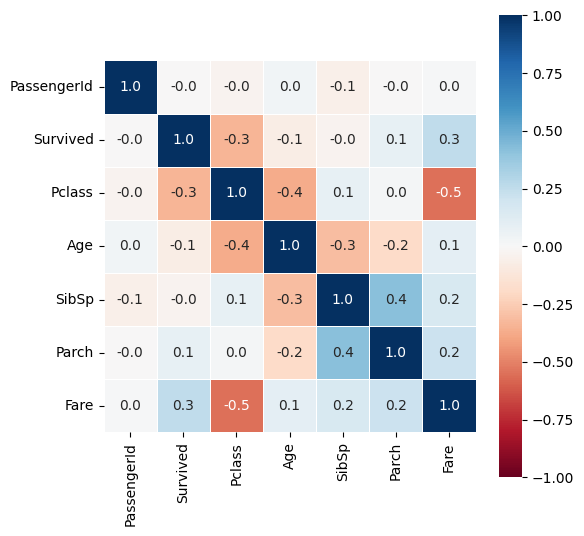

In [9]:
fig, ax = plt.subplots(figsize=(6, 6))

corr_matrix = data_cleaned.corr(numeric_only=True)
sb.heatmap(corr_matrix,
           
           annot=True,
           vmin=-1, vmax=1,
           square=True,
           cmap="RdBu",
           linewidths=.5, fmt=".1f", ax=ax)

plt.show()

# Teilen in Daten und Label

- Label: "Survived" --> 0 nicht überlebt | 1 überlebt
- Daten: Alles ausser "Survived" --> `.drop()`

### Aufgaben:
- Aus `data` die Daten `X` und die Labels `y` erstellen.

In [9]:
# label

data_cleaned=data.dropna()

# data

X = data_cleaned.drop(["Survived","Name","Cabin","Ticket","Embarked"], axis=1)
y = data_cleaned["Survived"]


## Train-Test split
Mit der scikit-learn Funktion `train_test_split` wird ein Datensatz zufällig auf Trainings- und Test-Daten verteilt. Wir können dabei angeben welcher Anteil zu Testdaten wird mit `test_size=...` wobei Werte zwischen 0 (keine Daten) und 1 (alle Daten) eingesetzt werden.
Siehe auch die [Scikit-Learn Dokumentation zu train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).

Da es eine zufällige Aufteilung ist, legen wir besser einen "Seed" fest um es reproduzierbar zu machen, und zwar mit `random_state=0` (oder einer anderen Zahl).



In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder

# Train-test split
LabelEncoder=LabelEncoder()
X["Sex"]=LabelEncoder.fit_transform(X["Sex"])
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

X_train.shape, X_test.shape

((146, 7), (37, 7))

## Daten skalieren

Für einige Algorithmen ist es sehr wichtig, dass die Daten alle ähnlich skaliert sind. Zum Beispiel auch für k-nearest-neighbors. Dafür verwenden wir wieder den `StandardScaler` von Scikit-Learn. 

Am "saubersten" ist es hierbei, wenn die Skalierung **auf Basis der Trainings-daten** durchgeführt wird so dass keine indirekten Informationen von den Test-Daten mit einbezogen werden.

## Vorhersagen machen
Während wir mit `.fit()` ein Modell trainieren, können wir mit `.predict()` Vorhersagen machen.

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Standardisierung der Trainingsdaten
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.values)

# Standardisierung der Testdaten (ohne Fit, um Datenleck zu vermeiden)
X_test_scaled = scaler.transform(X_test.values)

# Initialisierung und Training des KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Vorhersage der Überlebenswahrscheinlichkeit für alle Datenpunkte
prediction_survival = knn.predict(X)


/Users/fouadghazal/miniconda3/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


## Ergebnisse auswerten

Eine gute Möglichkeit um Klassifizierungs-Vorhersagen zu prüfen ist die "confusion matrix". Dafür nehmen wir die entsprechende Funktion aus scikit-learn (`confusion_matrix()` und übergeben ihr als Parameter die tatsächlichen Label sowie die vorhergesagten Label.

In [12]:
from sklearn.metrics import confusion_matrix

confusion_matrix(# add code here)

SyntaxError: incomplete input (1805753307.py, line 3)

In [ ]:
knn.classes_

In [ ]:
fig, ax = plt.subplots(figsize=(4, 4))

sb.heatmap(confusion_matrix(# add code here),
           annot=True, cmap="Blues", cbar=False, fmt=".0f",
           xticklabels=["Died", "Survived"],
           yticklabels=["Died", "Survived"])

# Decision Tree

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?highlight=decision%20tree#sklearn.tree.DecisionTreeClassifier

In [ ]:
from sklearn.model_selection import train_test_split

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) 

# Entscheidungsbäume brauchen keine Skalierung!!

In [ ]:
X_train.head()

### Zuerste einen Decision Tree trainieren ohne Parameter anzupassen:

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(# add code here)

In [ ]:
# Hiermit machen wir Vorhersagen auf den Trainingsdaten
prediction_survival = tree.predict(X_train)
prediction_survival

In [ ]:
fig, ax = plt.subplots(figsize=(4, 4))

sb.heatmap(confusion_matrix(y_train, prediction_survival),
           annot=True, cmap="Blues", cbar=False, fmt=".0f",
           xticklabels=["Died", "Survived"],
           yticklabels=["Died", "Survived"])

### Evaluation:
Sieht so aus, als wäre das Modell ziemlich gut. Was müssten wir noch prüfen um das mit Sicherheit sagen zu können?

- Schaut euch mal das gleiche an, aber diesmal für das Test-Set.

# Modell trainieren
Hier jetzt ein Decision Tree Modell, wieder mit scikit-learn. Siehe [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?highlight=decision%20tree#sklearn.tree.DecisionTreeClassifier).
Der wichtigste Parameter ist `max_depth`, d.h. die maximale Tiefe des Baumes.

### Aufgabe:
- Ein decision tree Modell mit den Trainingsdaten trainieren und einer maximalen Tiefe von 2. 

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree = # add own code

## Ergebnisse auswerten

### Aufgaben:
Ganz genau wie zuvor beim kNN-Modell ist die Aufgabe hier:
- Vorhersagen zu den Test-daten machen
- Vergleichen mit den tatsächlichen Werten über eine confusion matrix.

In [ ]:
prediction_survival = # add own code
prediction_survival

In [ ]:
fig, ax = plt.subplots(figsize=(4, 4))

sb.heatmap(confusion_matrix(# add own code),
           annot=True, cmap="Blues", cbar=False, fmt=".0f",
           xticklabels=["Died", "Survived"],
           yticklabels=["Died", "Survived"])

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(# add own code)

## Interessant an Entscheidungsbäumen:
Eine gern genutze Eigenschaft von Eintscheidungsbäumen ist, dass wir uns die Bäume auch ausgeben lassen können!

In [ ]:
X_train.columns

In [ ]:
from sklearn.tree import plot_tree

feature_names = X_train.columns

fig, ax = plt.subplots(figsize=(10, 10))
plot_tree(tree, feature_names=feature_names, filled=True)
plt.show()

### Aufgabe:
- das gleiche Spiel nochmal laufen lassen, aber diesmal mit einer Baumtiefe von 4

In [ ]:
tree = DecisionTreeClassifier(# add own code)
# train model


In [ ]:
prediction_survival = # add own code

In [ ]:
fig, ax = plt.subplots(figsize=(4, 4))

sb.heatmap(confusion_matrix(# add own code),
           annot=True, cmap="Blues", cbar=False, fmt=".0f",
           xticklabels=["Died", "Survived"],
           yticklabels=["Died", "Survived"])

In [ ]:
X_train.columns

In [ ]:
feature_names = X_train.columns

fig, ax = plt.subplots(figsize=(10, 10))
plot_tree(tree, feature_names=feature_names, filled=True)
plt.show()